# **Image classification with TensorFlow**

In this module we will explore a brief tutorial about using Convolutional Neural Networks and TensorFlow library for image classification.
We will start just using

1.   MNIST
2.   Flowers

Both datasets are contained in TensorFlow.
As we will briefly see we will even focus on some techniques like data augmentation, max/mean pooling or similar. In the end we will try another technique: Transfer Learning, applying a pre-trained Neural Network.

It is just a notebook used for practising on the subject and resuming programming with tensorflow.

However, for the ‘uninitiated’ I suggest the following sources, should they be interested:

1.   [Introduction to Deep Learning (Kaggle)](https://www.kaggle.com/learn/intro-to-deep-learning): an excellent course in Kaggle explaining deep-learning first concepts
2.   [Computer Vision](https://www.kaggle.com/learn/computer-vision): explaining computer vision first concepts
3. [StatQuest explaining video](https://www.youtube.com/watch?v=HGwBXDKFk9I&t=588s) suggested to understand the intuitive idea behind CNN.



# **Image classification with ANN**

In [120]:
#let's start importing tensorflow and basical libraries

import tensorflow as tf
import matplotlib.pyplot as plt #matplotlib for graphs
print(tf.__version__)#let's check our tensorflow version (in out case should be
#2.17.1)

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input,Dropout,Flatten

from tensorflow.keras.losses import SparseCategoricalCrossentropy

import numpy as np

2.17.1


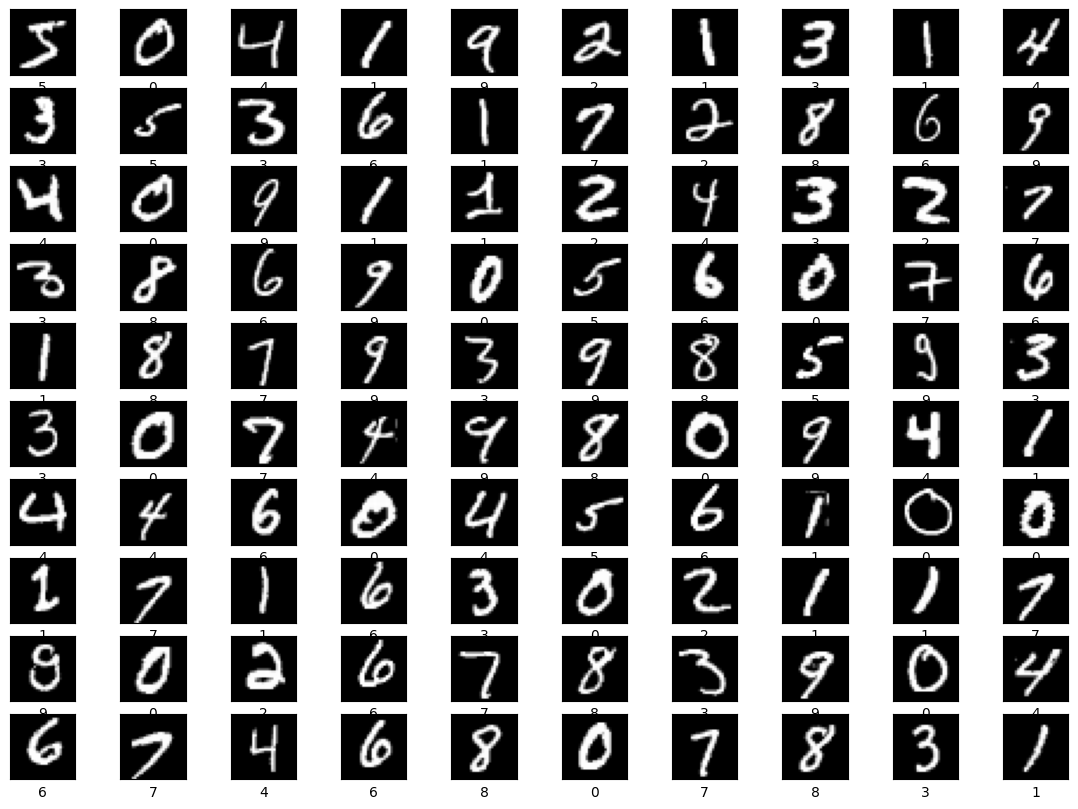

In [121]:
# let us upload MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train/255

x_test=x_test/255

plt.figure(figsize=(14, 10))

# Let us show first 100 image in dataset

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])

plt.show()

We have two ways to write an ANN in tensorflow:

1) using Sequential API

2) using Functional API

while the first one is simpler and more linear (is good even for simple model), the second one is used for more complex model even with more output. Even if, expecially here, it's not mandatory, we will use immediately Functional API.

In [122]:
inputs=Input(shape=(28,28))

x=Flatten()(inputs)

x=Dense(128,activation='relu')(x)

x=Dropout(0.2)(x)

outputs=Dense(10,activation='linear')(x)

model=Model(inputs=inputs,outputs=outputs)
'''
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10,activation='linear')
]) ----> this is the sequential version!
'''

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8620 - loss: 0.4721 - val_accuracy: 0.9596 - val_loss: 0.1419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9535 - loss: 0.1551 - val_accuracy: 0.9659 - val_loss: 0.1092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1078 - val_accuracy: 0.9737 - val_loss: 0.0877
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9728 - loss: 0.0878 - val_accuracy: 0.9739 - val_loss: 0.0748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0768 - val_accuracy: 0.9764 - val_loss: 0.0741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9797 - loss: 0.0629 - val_accuracy: 0.9792 - val_loss: 0.0709
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0535 - val_accuracy: 0.9801 - val_loss: 0.0689
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0507 - 

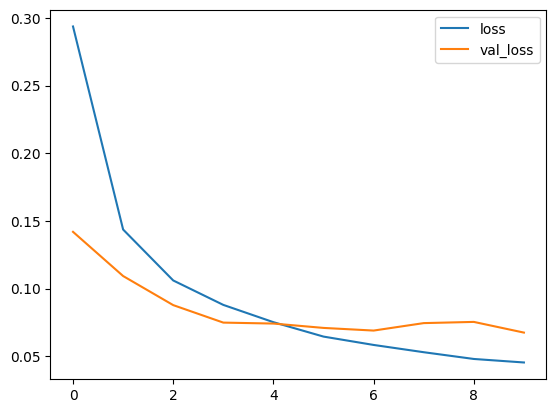

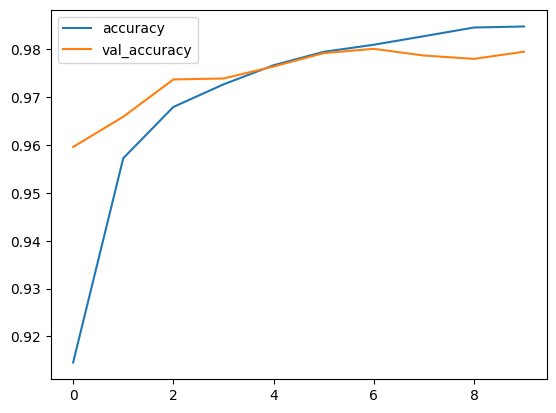

In [123]:

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [124]:
y_pred=model.predict(x_test)

probabilities = np.argmax(tf.nn.softmax(y_pred).numpy(),axis=1)

print(probabilities)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[7 2 1 ... 4 5 6]


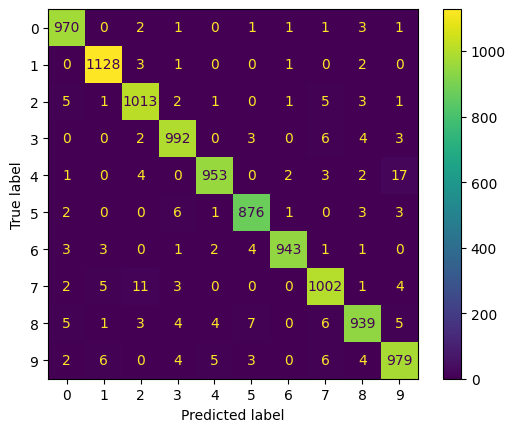

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#computute confusion matrix
cm = confusion_matrix(y_test, probabilities)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

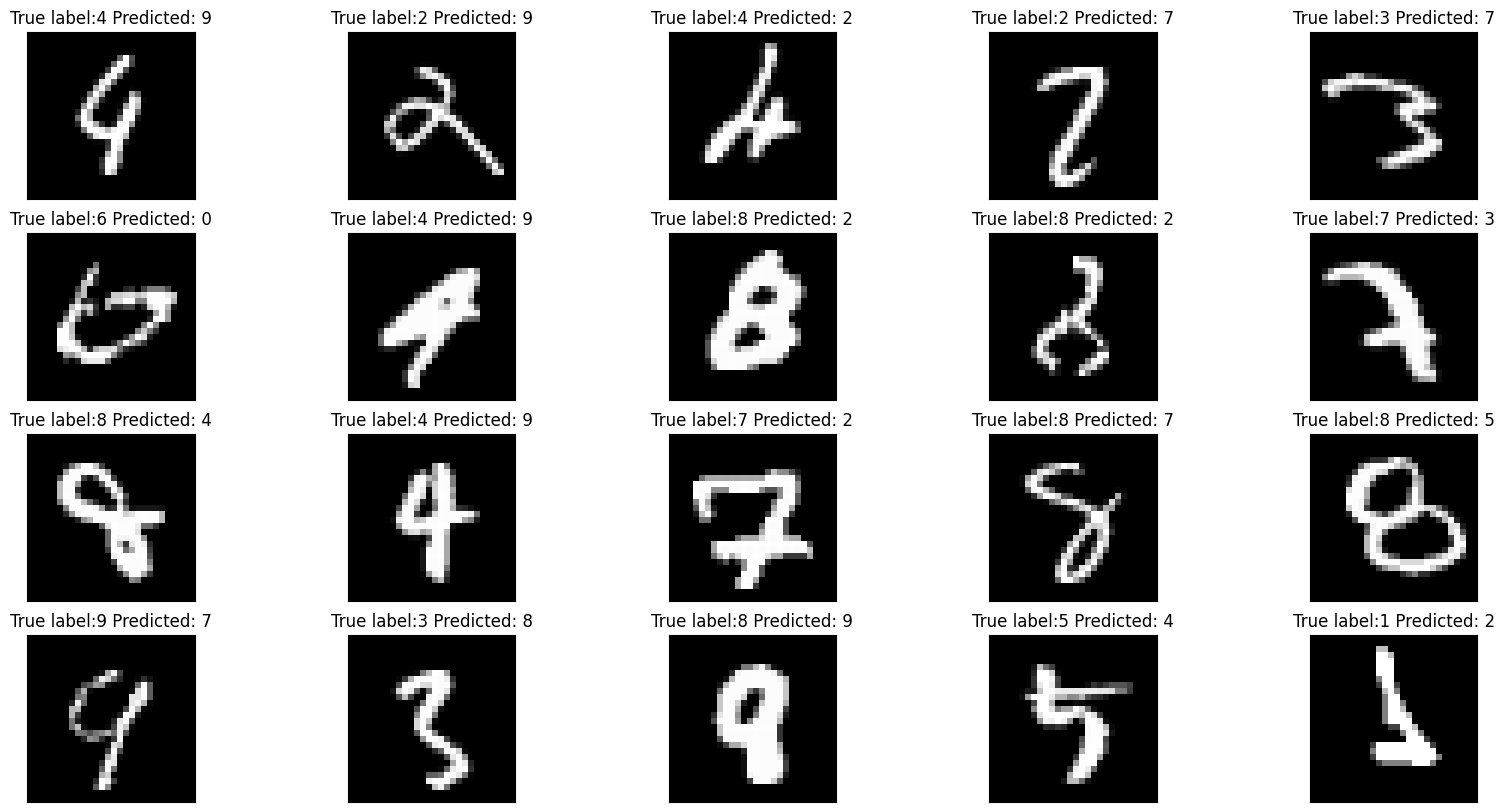

In [126]:
misclassified_idx = np.where(probabilities != y_test)[0]
'''
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], probabilities[i]));
'''
first100=misclassified_idx[:20]
plt.figure(figsize=(20, 10))
k=0
# Let us show first 100 image in dataset
for i in first100:
    plt.subplot(4, 5, k + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("True label:%s Predicted: %s" % (y_test[i], probabilities[i]))
    k=k+1


# **Image classification with CNN**

Anyway, especially for colour (and with more details) than usual it's better use more complex methods as convolutional neural networks (CNN). This kind of NN, despite than definition, uses cross-correlational layers (yes, CNN does not use convolution, but cross-correlation). Pros are that this kind of NN are able in finding patterns in images and correlation. In dependency, the parameters to be estimated are much less.

In [127]:
from tensorflow.keras.layers import Conv2D, Dropout, BatchNormalization,MaxPooling2D


In [128]:
import tensorflow_datasets as tfds

#upload flowers dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

dataset = dataset['train']


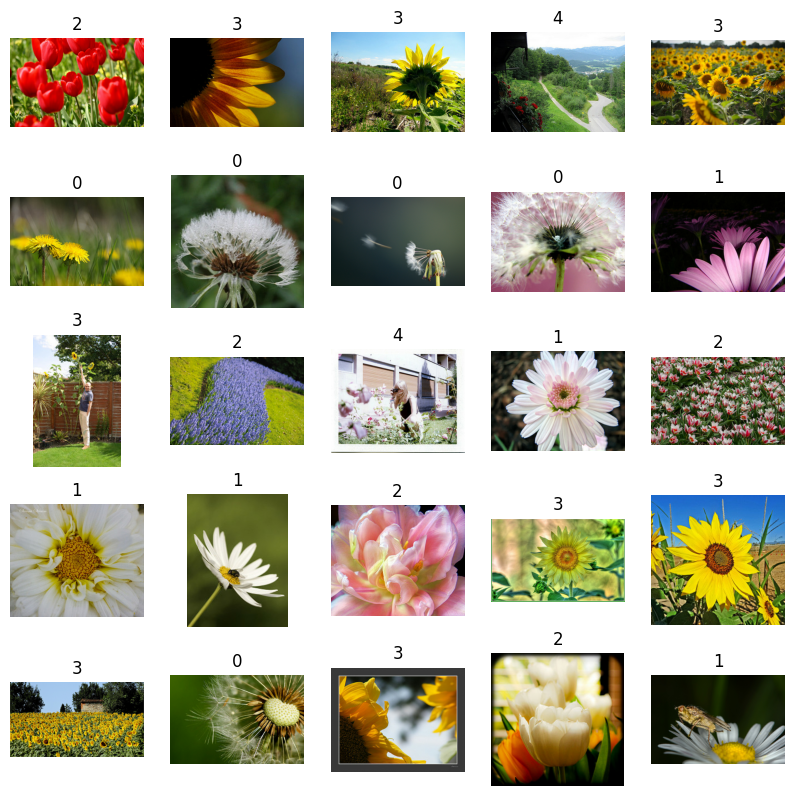

In [129]:
def show_images(dataset, num_images):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(image.numpy()/255)
        plt.title(int(label))
        plt.axis("off")

# Let us visualize first 25 image in dataset
show_images(dataset, 25)
plt.show()


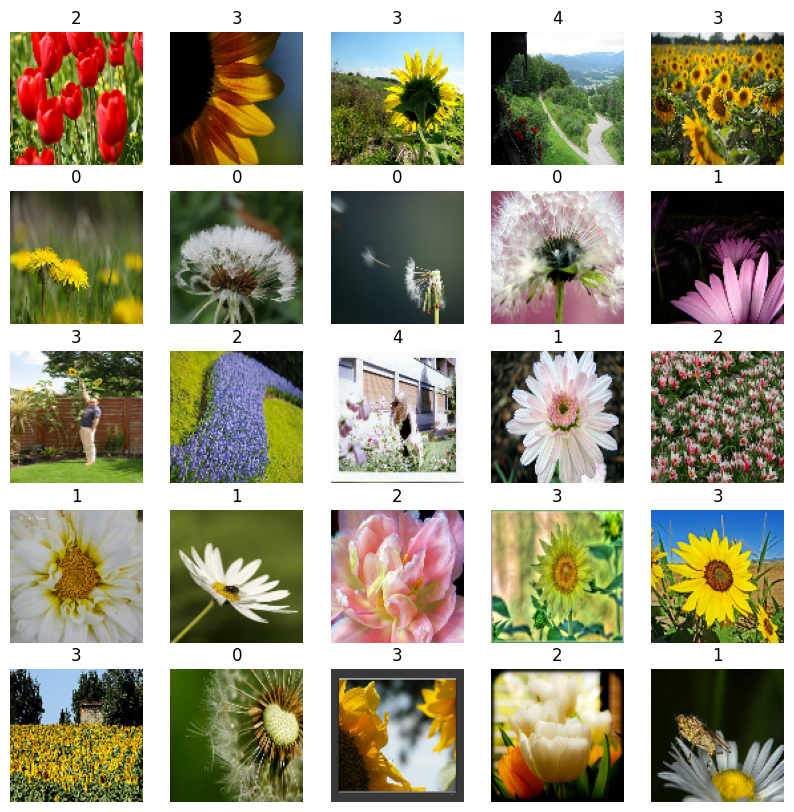

In [130]:

def preprocess_image(image, label):
    image = tf.image.resize(image, [100, 100])  # we change image at 100x100
    return image, label

dataset_preprocess = dataset.map(preprocess_image)

show_images(dataset_preprocess, 25)




In [131]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split

def dataset_to_numpy(dataset):
    images = []
    labels = []
    for image, label in tfds.as_numpy(dataset):
        images.append(image/255)
        labels.append(label)
    return np.array(images), np.array(labels)

#let's convert dataset in numpy
dataset_preprocess_np, labels_np = dataset_to_numpy(dataset_preprocess)

x_train, x_test, y_train, y_test = train_test_split(dataset_preprocess_np, labels_np, test_size=0.2, random_state=42)

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,          # random image rotation until 20 degrees
    width_shift_range=0.2,      # orizzontal random transation
    height_shift_range=0.2,     # vertical random transation
    shear_range=0.2,
    zoom_range=0.2,             # image random zoom until 20 %
    horizontal_flip=True,       # images horizontal flip
    fill_mode='nearest'         # pixel filling with the nearest value
)
train_generator = data_generator.flow(x_train, y_train)

print(f"Classes are:{np.unique(labels_np)}")

Classes are:[0 1 2 3 4]


In [141]:

# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(5, activation='linear')(x)

model = Model(i, x)
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

r = model.fit(train_generator, validation_data=(x_test, y_test), epochs=10,batch_size=100)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.3697 - loss: 10.2897 - val_accuracy: 0.2534 - val_loss: 3.0067
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.4765 - loss: 1.6261 - val_accuracy: 0.1839 - val_loss: 4.9120
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.5453 - loss: 1.1904 - val_accuracy: 0.3379 - val_loss: 2.2704
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5847 - loss: 1.0737 - val_accuracy: 0.3842 - val_loss: 1.7208
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.6002 - loss: 1.0386 - val_accuracy: 0.5136 - val_loss: 1.1912
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.5920 - loss: 1.0102 - val_accuracy: 0.6117 - val_loss: 1.1041
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.6289 - loss: 0.9567 - val_accuracy: 0.6390 - val_loss: 1.0256
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.6196 - loss: 0.9389 - val_accuracy: 0.6580 

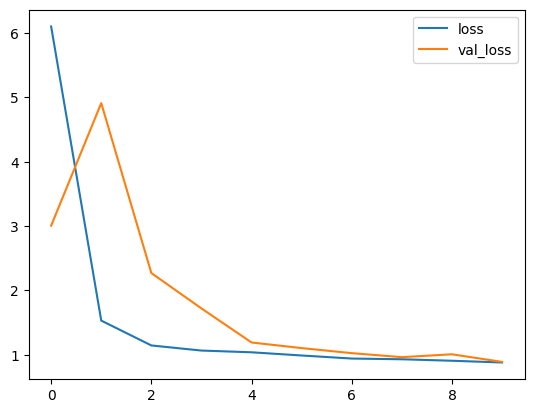

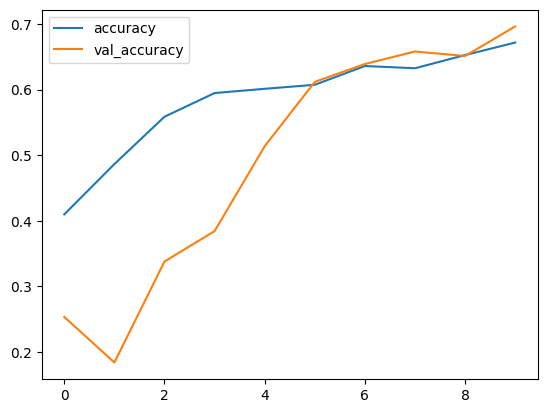

In [142]:

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
[0 1 2 3 4]


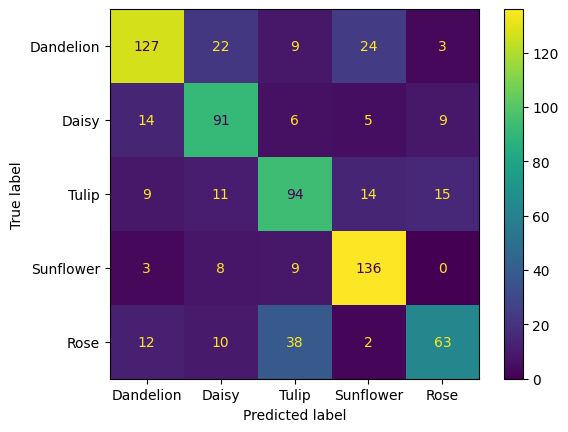

In [143]:
y_pred=model.predict(x_test)

probabilities = np.argmax(tf.nn.softmax(y_pred).numpy(),axis=1)

print(np.unique(probabilities))

label=['Dandelion','Daisy','Tulip','Sunflower','Rose']

#computute confusion matrix
cm = confusion_matrix(y_test, probabilities)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
disp.plot()


plt.show()

In [144]:
misclassified_idx = np.where(probabilities != y_test)[0]
'''
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], probabilities[i]));
'''
first100=misclassified_idx[:20]
plt.figure(figsize=(20, 20))
k=0


# Let us show first 100 image in dataset
for i in first100:
    plt.subplot(4, 5, k + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("True label:%s \n Predicted: %s" % (label[y_test[i]], label[probabilities[i]]))
    k=k+1


Output hidden; open in https://colab.research.google.com to view.

## **Transfer Learning**

In this section we are going to use a transfer learning tactic. The idea is very simple. Use a pre-trained neural network to compute the parameters of the final dense layers on the basis of the training images. There are already pre-trained neural networks on tensor-flow. Of these, the one we use is the mobile-net: MobileNetV2, trained on a very large number of images with corresponding classes: Imagenet

In [145]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

print(x_train[0].shape)
# Upload MobileNetV2, include_top=False means to exclude last layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100,100,3))

#add personalized convolutional layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
predictions = Dense(5, activation='linear')(x)
model_tl = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_tl.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

r=model_tl.fit(train_generator, validation_data=(x_test, y_test), epochs=10)


(100, 100, 3)


<ipython-input-145-347c321e5edc>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100,100,3))


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.5857 - loss: 1.3438 - val_accuracy: 0.7875 - val_loss: 0.5769
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8084 - loss: 0.5447 - val_accuracy: 0.7439 - val_loss: 0.6932
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7959 - loss: 0.5562 - val_accuracy: 0.7875 - val_loss: 0.5757
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8226 - loss: 0.4792 - val_accuracy: 0.8025 - val_loss: 0.5485
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8248 - loss: 0.4587 - val_accuracy: 0.8174 - val_loss: 0.4745
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8278 - loss: 0.4388 - val_accuracy: 0.8106 - val_loss: 0.5135
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8498 - loss: 0.3913 - val_accuracy: 0.8161 - val_loss: 0.5276
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8507 - loss: 0.3846 - val_accuracy: 0.8460 -

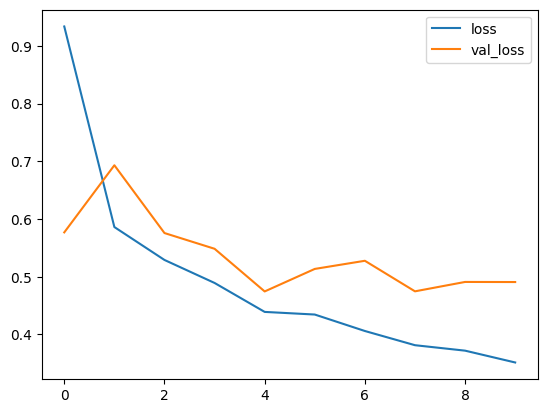

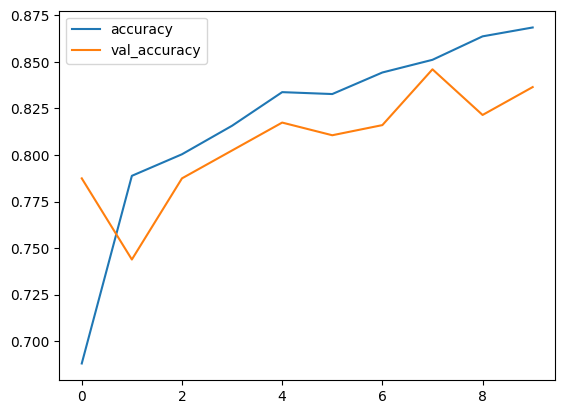

In [146]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

(734, 100, 100, 3)
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step
[0 1 2 3 4]


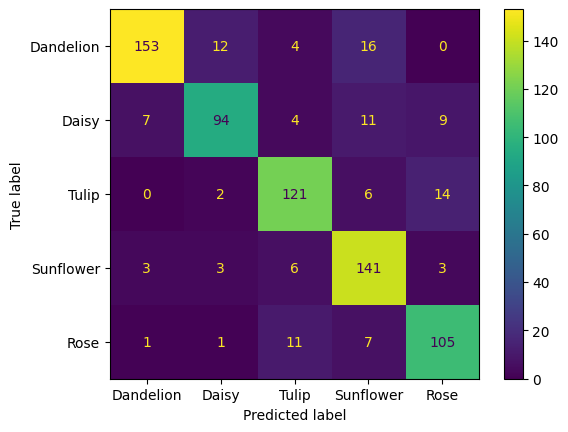

In [147]:
print(x_test.shape)

y_pred=model_tl.predict(x_test)

probabilities = np.argmax(tf.nn.softmax(y_pred).numpy(),axis=1)

print(np.unique(probabilities))

#computute confusion matrix
cm = confusion_matrix(y_test, probabilities)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
disp.plot()

#show plot
plt.show()

In [148]:
print(y_test.shape)

(734,)


In [149]:
misclassified_idx = np.where(probabilities != y_test)[0]
'''
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], probabilities[i]));
'''
first100=misclassified_idx[:20]
plt.figure(figsize=(20, 20))
k=0

label=['Dandelion','Daisy','Tulip','Sunflower','Rose']

# Let us show first 100 image in dataset
for i in first100:
    plt.subplot(4, 5, k + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("True label:%s \n Predicted: %s" % (label[y_test[i]], label[probabilities[i]]))
    k=k+1


Output hidden; open in https://colab.research.google.com to view.